Task 1: Loading and Exploring the Dataset
-----------------------------------------

First 5 rows of the dataset:
        Date     Product   Region  Units_Sold  Unit_Price  Total_Sales
0 2023-01-01     Monitor  Central         5.0     1370.49      6852.45
1 2023-01-02    Keyboard     West        29.0      228.08      6614.32
2 2023-01-03  Headphones     East         4.0      392.06      1568.24
3 2023-01-04    Keyboard     West        10.0      290.00      2900.00
4 2023-01-05    Keyboard  Central        17.0      320.17      5442.89

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Product      365 non-null    object        
 2   Region       365 non-null    object        
 3   Units_Sold   347 non-null    float64       
 4   Unit_Price   365 non-null    float64 

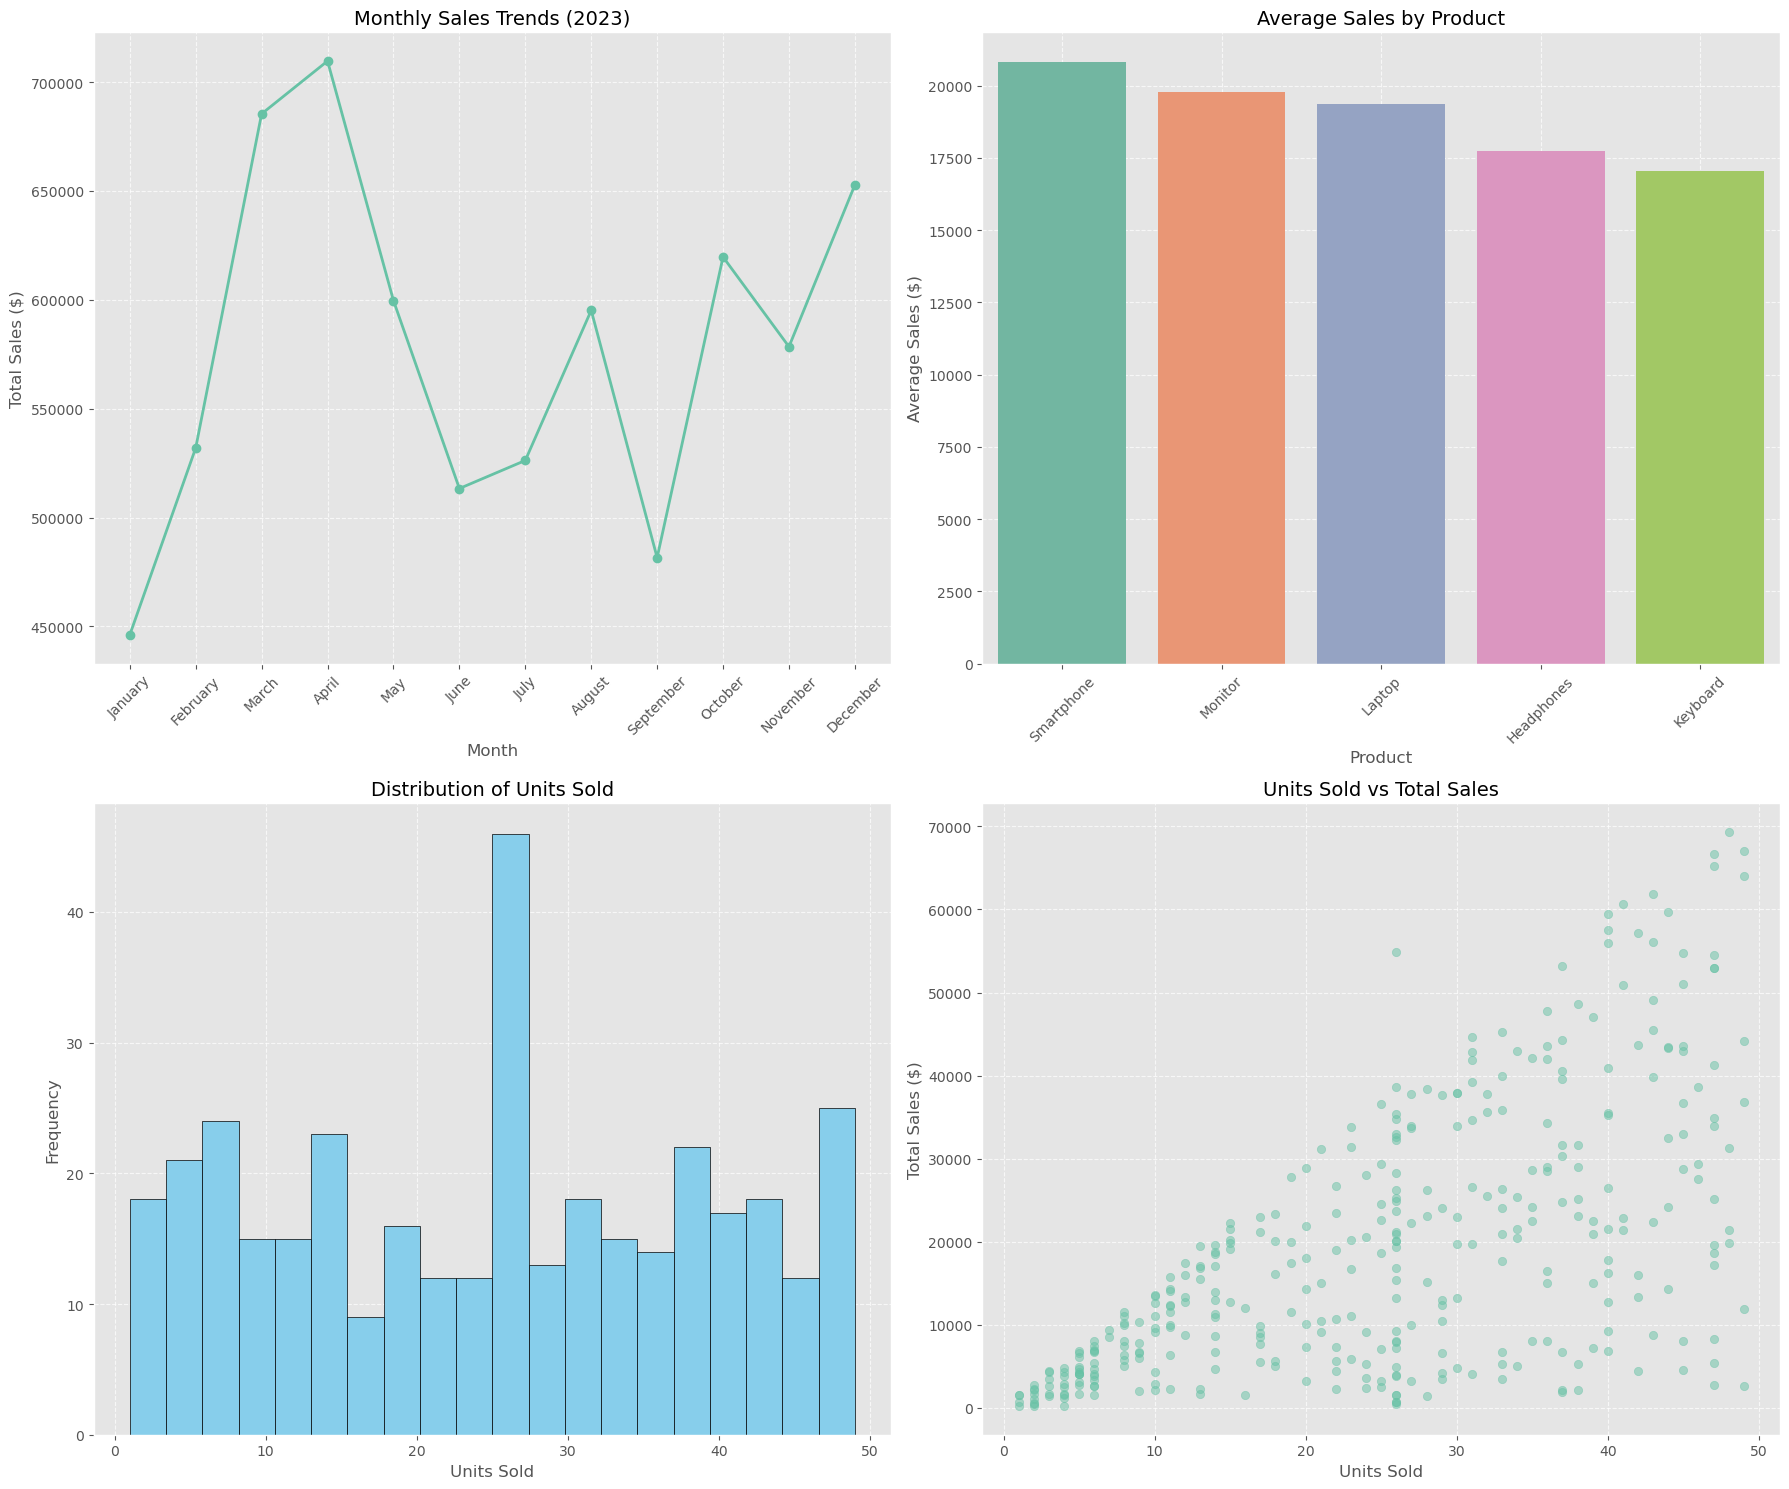

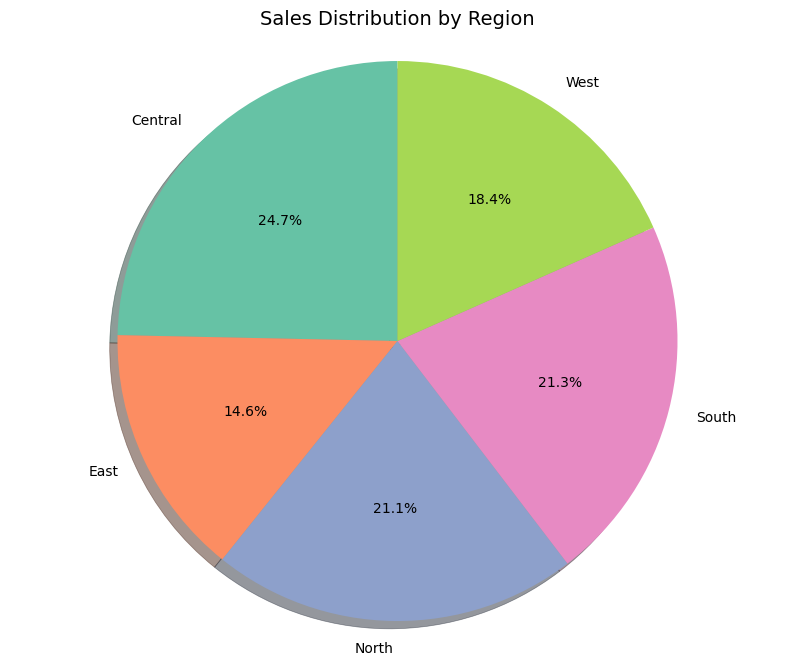

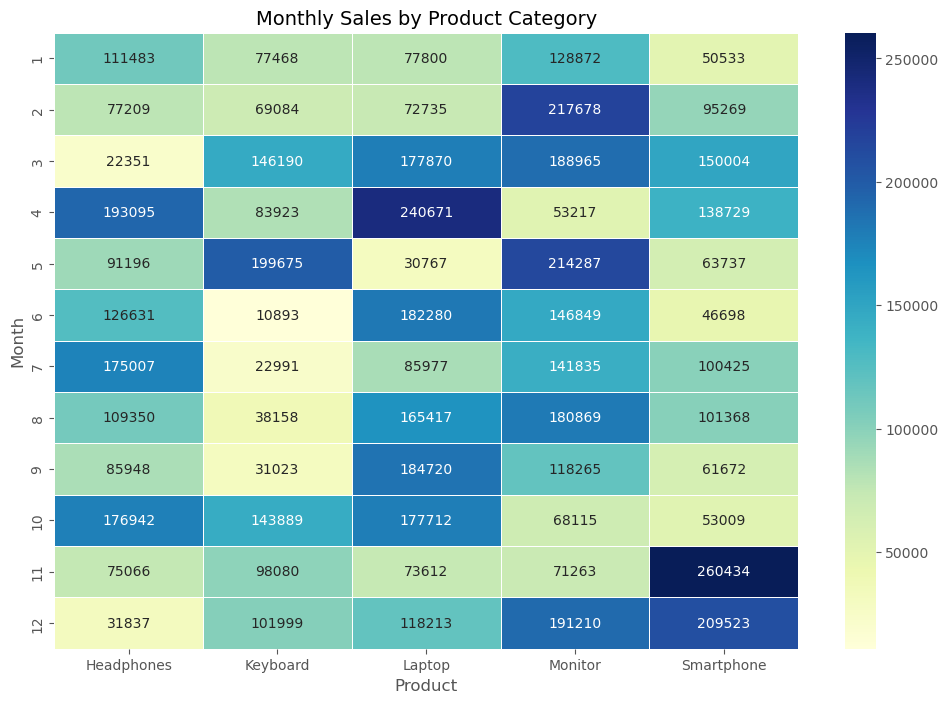


Data Analysis Insights:
1. The highest selling product is Smartphone with an average sales of $20803.18
2. The top performing region is South with an average sales of $19944.13
3. The month with highest sales was April with total sales of $709634.59
4. The average number of units sold per transaction is 24.87

Analysis Complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
plt.style.use('ggplot')
sns.set_palette("Set2")

# Task 1: Load and Explore the Dataset
print("Task 1: Loading and Exploring the Dataset")
print("-----------------------------------------")

# Creating a sample sales dataset
np.random.seed(42)  # For reproducibility

# Generate sample dates for 2023
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Generate sample data
n_samples = len(dates)
products = ['Laptop', 'Smartphone', 'Headphones', 'Monitor', 'Keyboard']
regions = ['North', 'South', 'East', 'West', 'Central']

data = {
    'Date': dates,
    'Product': np.random.choice(products, size=n_samples),
    'Region': np.random.choice(regions, size=n_samples),
    'Units_Sold': np.random.randint(1, 50, size=n_samples),
    'Unit_Price': np.random.uniform(50, 1500, size=n_samples).round(2),
}

# Create Dataframe
sales_df = pd.DataFrame(data)

# Calculate total sales
sales_df['Total_Sales'] = sales_df['Units_Sold'] * sales_df['Unit_Price']

# Introducing some missing values for demonstration
missing_indices = np.random.choice(sales_df.index, size=int(n_samples * 0.05), replace=False)
sales_df.loc[missing_indices, 'Units_Sold'] = np.nan

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(sales_df.head())

# Check dataset structure
print("\nDataset Structure:")
print(sales_df.info())

# Check for missing values
print("\nMissing Values:")
print(sales_df.isnull().sum())

# Clean the dataset - fill missing values with median
median_units = sales_df['Units_Sold'].median()
sales_df['Units_Sold'].fillna(median_units, inplace=True)
print(f"\nFilled {len(missing_indices)} missing values with median: {median_units}")

# Check that there are no more missing values
print("\nMissing Values after cleaning:")
print(sales_df.isnull().sum())

# Task 2: Basic Data Analysis
print("\n\nTask 2: Basic Data Analysis")
print("--------------------------")

# Compute basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(sales_df.describe())

# Perform groupings by Product and compute means
print("\nMean sales by Product:")
product_group = sales_df.groupby('Product').agg({
    'Units_Sold': 'mean',
    'Total_Sales': 'mean'
}).sort_values('Total_Sales', ascending=False)
print(product_group)

# Perform groupings by Region and compute means
print("\nMean sales by Region:")
region_group = sales_df.groupby('Region').agg({
    'Units_Sold': 'mean',
    'Total_Sales': 'mean'
}).sort_values('Total_Sales', ascending=False)
print(region_group)

# Monthly analysis
sales_df['Month'] = sales_df['Date'].dt.month_name()
sales_df['Month_Num'] = sales_df['Date'].dt.month
monthly_sales = sales_df.groupby(['Month_Num', 'Month'])['Total_Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month_Num')

print("\nMonthly Sales Summary:")
print(monthly_sales[['Month', 'Total_Sales']])

# Task 3: Data Visualization
print("\n\nTask 3: Data Visualization")
print("-------------------------")

# Create a figure with subplots
fig = plt.figure(figsize=(18, 15))

# 1. Line chart - Monthly sales trends
plt.subplot(2, 2, 1)
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales'], marker='o', linewidth=2)
plt.title('Monthly Sales Trends (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Bar chart - Average sales by product
plt.subplot(2, 2, 2)
ax = sns.barplot(x=product_group.index, y=product_group['Total_Sales'])
plt.title('Average Sales by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Average Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Histogram - Distribution of Units Sold
plt.subplot(2, 2, 3)
plt.hist(sales_df['Units_Sold'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Units Sold', fontsize=14)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Scatter plot - Units Sold vs Total Sales
plt.subplot(2, 2, 4)
plt.scatter(sales_df['Units_Sold'], sales_df['Total_Sales'], alpha=0.5)
plt.title('Units Sold vs Total Sales', fontsize=14)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("sales_analysis_visualizations.png")
plt.show()

# Additional visualization - Sales by Region (pie chart)
plt.figure(figsize=(10, 8))
region_sales = sales_df.groupby('Region')['Total_Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Distribution by Region', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig("sales_by_region_pie.png")
plt.show()

# Additional visualization - Heatmap of monthly sales by product
monthly_product_sales = sales_df.groupby(['Month_Num', 'Product'])['Total_Sales'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_product_sales, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Monthly Sales by Product Category', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.savefig("monthly_product_heatmap.png")
plt.show()

print("\nData Analysis Insights:")
print("1. The highest selling product is", product_group.index[0], 
      "with an average sales of ${:.2f}".format(product_group['Total_Sales'].iloc[0]))
print("2. The top performing region is", region_group.index[0], 
      "with an average sales of ${:.2f}".format(region_group['Total_Sales'].iloc[0]))
print("3. The month with highest sales was", monthly_sales.iloc[monthly_sales['Total_Sales'].idxmax()]['Month'], 
      "with total sales of ${:.2f}".format(monthly_sales['Total_Sales'].max()))
print("4. The average number of units sold per transaction is {:.2f}".format(sales_df['Units_Sold'].mean()))

print("\nAnalysis Complete!")